# Research on how New York City schools' demographic influence the students chronically absent rate

# Project ONE

## Introduction
PASSNYC is a not-for-profit organization dedicated to promoting educational opportunities for New York City's talented and underserved students. In 2016, PASSNYC collected 1273 schools' data to identify students within New York City's under-performing school districts, and aims to increase the diversity of students taking the Specialized High School Admissions Test (SHSAT). The `2016 School Explorer` dataset contains 1273 New York schools and each school's specific demographics like absent rate, races distribution, location and Collaborative Teachers Rating etc.

Using PASSNYC dataset, we can measure schools' performance in education. This research aims to analyze how New York City schools' location and 4 different races (White/Black/Asian/Hispanic) influence the students chronically absent rate. In general, we will select 5 areas with the greatest number of schools of New York City and then look at the student races within 5 areas to analyze their influence on absent rate. Based on the analysis result, the PASSNYC can identify those targeted areas (or races) and implement related policy to decrease the absent rate of those targeted areas (or races).It will promote better reallocation of educational resources.

In the following analysis, we will use the summary table, boxplot, bar graph, and correlation table to better illustrate the factors that affect the absence of the student.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
import plotly.graph_objs as go
import geopandas as gpd

from plotly.offline import iplot
from shapely.geometry import Point

%matplotlib inline

import qeds
qeds.themes.mpl_style();

import warnings
warnings.filterwarnings("ignore")

## Read data

First, we read the data in python and return the first 5 rows of data frame. We have the information with 1272 rows and 161 columns.

In [2]:
nyc=r'C:\Users\WLJY8\Desktop\Courses\YEAR 4\ECO225\Project 1\2016 School Explorer.csv'
df = pd.DataFrame(pd.read_csv(nyc))

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Columns: 161 entries, Adjusted Grade to Grade 8 Math 4s - Economically Disadvantaged
dtypes: float64(5), int64(123), object(33)
memory usage: 1.6+ MB


In [4]:
 df.iloc[:, 3:26] .head(2)

School Name      SED Code Location Code  District   Latitude  \
0  P.S. 015 ROBERTO CLEMENTE  310100010015        01M015         1  40.721834   
1        P.S. 019 ASHER LEVY  310100010019        01M019         1  40.729892   

   Longitude                   Address (Full)      City    Zip  \
0 -73.978766  333 E 4TH ST NEW YORK, NY 10009  NEW YORK  10009   
1 -73.984231   185 1ST AVE NEW YORK, NY 10003  NEW YORK  10003   

                 Grades  ... Economic Need Index School Income Estimate  \
0  PK,0K,01,02,03,04,05  ...               0.919            $31,141.72    
1  PK,0K,01,02,03,04,05  ...               0.641            $56,462.88    

  Percent ELL  Percent Asian Percent Black Percent Hispanic  \
0          9%             5%           32%              60%   
1          5%            10%           20%              63%   

  Percent Black / Hispanic Percent White Student Attendance Rate  \
0                      92%            1%                     94%   
1                      83%            6%                     92%   

  Percent of Students Chronically Absent  
0                                    18%  
1                                    30%  

[2 rows x 23 columns]

## Data Clean

 `Percent of Students Chronically Absent` is the dependent value that resprsent each school's absence rate. In this column, we have 25 `NaN` missing data which is small group compare to total of 1272 information. In order to keep the dataset integrity, drop all `NaN`. Moreover,we use `Absent rate` to instead `Percent of Students Chronically Absent` for simplifying.

In [5]:
df['Percent of Students Chronically Absent'].isnull().sum()

25

In [6]:
df = df.dropna(subset=['Percent of Students Chronically Absent'])
df.rename(columns={'Percent of Students Chronically Absent':'Absent Rate'}, 
                 inplace=True)

After reading the dataset, we noticed that the value of `'Absent Rate'`, and independent variable - races `'Percent Asian','Percent Black','Percent Hispanic','Percent White'` are recorded in percentage and stored as `objects`. We preprocess those data and create a function to convert the percentage to a fraction. Thus, we keep those point as numerical values `float64`. 

In [7]:
df['Absent Rate'].dtype

dtype('O')

In [8]:
df['Percent Asian'].dtype

dtype('O')

In [9]:
def p2f(x):
    return float(x.strip('%'))/100

df['Absent Rate']=df['Absent Rate'].astype(str).apply(p2f)
df['Percent Asian']=df['Percent Asian'].astype(str).apply(p2f)
df['Percent Black']=df['Percent Black'].astype(str).apply(p2f)
df['Percent Hispanic']=df['Percent Hispanic'].astype(str).apply(p2f)
df['Percent White']=df['Percent White'].astype(str).apply(p2f)

In this case our dependent variable is `absent rate` and independent variables are `city` and `races`.
Since our original dataframe contains 161 columns, we need to reduce it into a smaller dataframe. 

In [10]:
df2=df[['School Name','Absent Rate','City','Longitude','Latitude','Percent Asian','Percent Black',
        'Percent Hispanic','Percent White','Economic Need Index','Zip']]

There are more than 40 areas of New York City; it is unnecessary to research all areas' influence on `absent rate`. We use the bar graph to show the number of schools in each city. We found that `Brooklyn`,`Bronx` and `New York` have more than 200 schools. However, some area like:`ROOSEVELT ISLAND`,`BROAD CHANNEL`,`SOUTH RICHMOND HILL`and `DOUGLASTON` only have 1-3 schools. We will drop the area with less than 20 schools since their sample dont have any representativeness. And then, we only keep the information of schools within those 7 areas (`BROOKLYN`,`BRONX`,`NEW YORK`,`STATEN ISLAND`,`JAMAICA`,`FLUSHING`,`LONG ISLAND CITY`). Those areas occupy about 85% of schools in NYC. 

In [11]:
def plot_city_hist(df, title_str):
    layout = go.Layout(
        title=title_str,
        xaxis=dict(
            title='City',
            titlefont=dict(
                family='Arial, sans-serif',
                size=12,
                color='black'
            ),
            showticklabels=True,
            tickangle=315,
            tickfont=dict(
                size=10,
                color='grey'
            )
        )
    )
    data = [go.Histogram(x=df['City'])]
    fig = go.Figure(data=data, layout=layout)
    return fig

fig = plot_city_hist(df2, 'City Wise School Distribution')

fig.update_layout(
    yaxis_title="Count",font=dict(
        family='Arial, sans-serif',
        size=10,
        color='black'
    ))
iplot(fig)

*Figure 1-1: Bar graph: City Wise School Distribution*

In [12]:
cities = ['BROOKLYN','BRONX','NEW YORK','STATEN ISLAND','JAMAICA','FLUSHING','LONG ISLAND CITY']
df2=df2[df2['City'].isin(cities)]
df2['City'].value_counts()

BROOKLYN            401
BRONX               291
NEW YORK            225
STATEN ISLAND        60
JAMAICA              31
FLUSHING             30
LONG ISLAND CITY     21
Name: City, dtype: int64

We check the variables type in new dataframe and they all satisfy our requirment.

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1059 entries, 0 to 1271
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   School Name          1059 non-null   object 
 1   Absent Rate          1059 non-null   float64
 2   City                 1059 non-null   object 
 3   Longitude            1059 non-null   float64
 4   Latitude             1059 non-null   float64
 5   Percent Asian        1059 non-null   float64
 6   Percent Black        1059 non-null   float64
 7   Percent Hispanic     1059 non-null   float64
 8   Percent White        1059 non-null   float64
 9   Economic Need Index  1059 non-null   float64
 10  Zip                  1059 non-null   int64  
dtypes: float64(8), int64(1), object(2)
memory usage: 99.3+ KB


The following is the sample from my new dataframe.

In [14]:
df2.head()

School Name  Absent Rate      City  Longitude  \
0       P.S. 015 ROBERTO CLEMENTE         0.18  NEW YORK -73.978766   
1             P.S. 019 ASHER LEVY         0.30  NEW YORK -73.984231   
2            P.S. 020 ANNA SILVER         0.20  NEW YORK -73.986315   
3  P.S. 034 FRANKLIN D. ROOSEVELT         0.28  NEW YORK -73.975043   
4       THE STAR ACADEMY - P.S.63         0.23  NEW YORK -73.986360   

    Latitude  Percent Asian  Percent Black  Percent Hispanic  Percent White  \
0  40.721834           0.05           0.32              0.60           0.01   
1  40.729892           0.10           0.20              0.63           0.06   
2  40.721274           0.35           0.08              0.49           0.04   
3  40.726147           0.05           0.29              0.63           0.04   
4  40.724404           0.04           0.20              0.65           0.10   

   Economic Need Index    Zip  
0                0.919  10009  
1                0.641  10003  
2                0.744  10002  
3                0.860  10009  
4                0.730  10009

## Variables Analysis

First, we compute the descriptive statistics to summarize the central tendency, dispersion and shape of `Absent Rate` distribution. For all schools within 7 area, the mean(the average of the data) of the absent rate is 0.23. And we also draw a boxplot graph which provides a graphical summary of the distribution of a sample.

In [15]:
df2['Absent Rate'].describe()

count    1059.000000
mean        0.228876
std         0.144385
min         0.000000
25%         0.120000
50%         0.220000
75%         0.320000
max         1.000000
Name: Absent Rate, dtype: float64

Text(0, 0.5, 'Absent Rate')

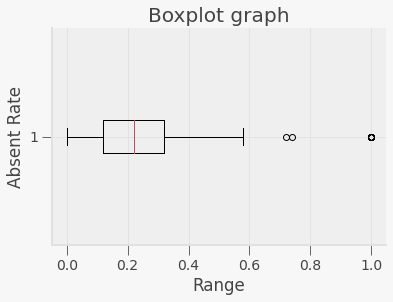

In [16]:
plt.boxplot(df2['Absent Rate'],vert = False)
plt.title('Boxplot graph')
plt.xlabel('Range')
plt.ylabel('Absent Rate')
#plt.text(-0.1,0,"Figure 1-2:Boxplot graph")

*Figure 1-2: Boxplot graph for absent rate*

Then, we use the same method to find the `Percent Asian` distribution. For all schools within 7 area, the mean(the average of the data) of the Percent Asian is 0.096988. 

In [17]:
df2['Percent Asian'].describe()

count    1059.000000
mean        0.096988
std         0.163868
min         0.000000
25%         0.010000
50%         0.030000
75%         0.090000
max         0.950000
Name: Percent Asian, dtype: float64

Final, we can look at the correlation between each area's races and each area's absent rates for further research. For example, we noticed that in BRONX area, the race Black is less correlated with absent rate compare to other areas. Also, compare with other areas, race White is highly negatively correlated with STATEN ISLAND students' absent rate and race Black is highly positively correlated with STATEN ISLAND students' absent rate.

In [18]:
df3 = df2[['Absent Rate','Percent Asian','Percent Black','Percent Hispanic','Percent White','City']]
df3.groupby('City').corr()

Absent Rate  Percent Asian  Percent Black  \
City                                                                           
BRONX            Absent Rate          1.000000      -0.205909       0.101028   
                 Percent Asian       -0.205909       1.000000      -0.215428   
                 Percent Black        0.101028      -0.215428       1.000000   
                 Percent Hispanic     0.072629      -0.227907      -0.813022   
                 Percent White       -0.248957       0.285204      -0.284045   
BROOKLYN         Absent Rate          1.000000      -0.349767       0.350683   
                 Percent Asian       -0.349767       1.000000      -0.582093   
                 Percent Black        0.350683      -0.582093       1.000000   
                 Percent Hispanic     0.087306      -0.103373      -0.523805   
                 Percent White       -0.408854       0.300603      -0.614333   
FLUSHING         Absent Rate          1.000000      -0.606158       0.727566   
                 Percent Asian       -0.606158       1.000000      -0.629709   
                 Percent Black        0.727566      -0.629709       1.000000   
                 Percent Hispanic     0.575649      -0.680925       0.356374   
                 Percent White       -0.036947      -0.614469      -0.057323   
JAMAICA          Absent Rate          1.000000      -0.522255       0.377798   
                 Percent Asian       -0.522255       1.000000      -0.806051   
                 Percent Black        0.377798      -0.806051       1.000000   
                 Percent Hispanic     0.130594       0.311156      -0.675023   
                 Percent White       -0.311665       0.028666      -0.357536   
LONG ISLAND CITY Absent Rate          1.000000      -0.568944       0.819058   
                 Percent Asian       -0.568944       1.000000      -0.593229   
                 Percent Black        0.819058      -0.593229       1.000000   
                 Percent Hispanic     0.232391      -0.363641       0.216770   
                 Percent White       -0.443900       0.089857      -0.584118   
NEW YORK         Absent Rate          1.000000      -0.313748       0.471726   
                 Percent Asian       -0.313748       1.000000      -0.326473   
                 Percent Black        0.471726      -0.326473       1.000000   
                 Percent Hispanic     0.145448      -0.451989      -0.268701   
                 Percent White       -0.415497       0.169279      -0.446566   
STATEN ISLAND    Absent Rate          1.000000      -0.150162       0.714519   
                 Percent Asian       -0.150162       1.000000      -0.212138   
                 Percent Black        0.714519      -0.212138       1.000000   
                 Percent Hispanic     0.605855      -0.118532       0.621438   
                 Percent White       -0.712207       0.001819      -0.870883   

                                   Percent Hispanic  Percent White  
City                                                                
BRONX            Absent Rate               0.072629      -0.248957  
                 Percent Asian            -0.227907       0.285204  
                 Percent Black            -0.813022      -0.284045  
                 Percent Hispanic          1.000000      -0.241240  
                 Percent White            -0.241240       1.000000  
BROOKLYN         Absent Rate               0.087306      -0.408854  
                 Percent Asian            -0.103373       0.300603  
                 Percent Black            -0.523805      -0.614333  
                 Percent Hispanic          1.000000      -0.180072  
                 Percent White            -0.180072       1.000000  
FLUSHING         Absent Rate               0.575649      -0.036947  
                 Percent Asian            -0.680925      -0.614469  
                 Percent Black             0.356374      -0.057323  
                 Percent Hispanic      

## Conclusion

In project 1, the data cleansing process improves our data quality, increases overall productivity and helps analysis accuracy. We prepare our data by removing some NA; checking the type of data and transfer them into numeric or character; and creating a new subset which contains variables we will need in the analysis.

We generate the descriptive statistics for our dependent variable `Absent Rate` and one independent variable `Percent Asian` to see their distribution. Later, we add the correlation table of `Race` and `Absent Rate` which grouped by `City`. It helps us to find the correlation coefficients between variables.

# Project 2

## THE MESSAGE AND UPDATED INTRODUCTION INFORMATION
The primary purpose of this research is to focus on how schools' demographics influence the absent rate.

We expect the `race black` and `race hispanic`has the most significant absent rate since it is more likely for them to lack pre-school eduation and face greater discriminationin in comparison to other races in general due to historical reason. And we also predict that the area with more schools may have larger absent rate since the sample size for those areas is larger (i.e.more students); meanwhile, the ethnic backgrounds of students are more diverse in those areas.

In the following research, I would like to use some bar graph, scatter plot and map to research on how independent variables `race` and `city` related to the `absent rate`. And I will add the one more independent variable `Economic Need Index` to figure out the potential impacts.

## Analysis

We draw the histogram to see the shape of the `absent rate` distribution. The data is right-skewed distribution and it is more concentrate on 0 to 0.4.

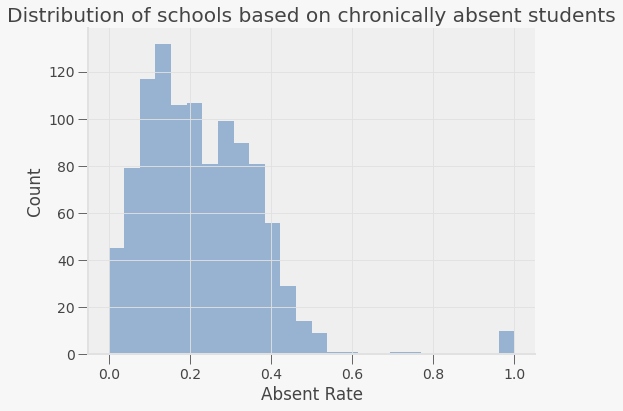

In [19]:
plt.figure(figsize = [8,6])

temp = sns.distplot(df2['Absent Rate'], kde=False)
temp = plt.title('Distribution of schools based on chronically absent students')
temp = plt.xlabel("Absent Rate")
temp = plt.ylabel("Count")

*Figure 2-1: Histogram graph - the Distribution of schools based on chronically absent students*

We use the aggregate and group-by function to see 7 areas schools' performance on the absent rate. The `FLUSHING` has the smallest aggreate max absent rate and smallest mean. `Bronx` has the largest mean and median. The performance of `LONG ISLAND CITY` AND `STATEN ISLAND` are quite similar.

In [20]:
df_citygroup = df2.groupby('City')['Absent Rate']
df_city_sta = df_citygroup.agg([np.min, np.max, np.mean,np.median, np.std])
df_city_sta

amin  amax      mean  median       std
City                                                    
BRONX             0.00  1.00  0.278144   0.280  0.121737
BROOKLYN          0.00  1.00  0.221546   0.200  0.139872
FLUSHING          0.02  0.29  0.099000   0.090  0.062442
JAMAICA           0.01  0.40  0.214194   0.220  0.098920
LONG ISLAND CITY  0.00  0.45  0.152381   0.130  0.102757
NEW YORK          0.00  1.00  0.217111   0.180  0.181362
STATEN ISLAND     0.05  0.41  0.182333   0.155  0.084620

The bar graph shows the absent student rate is highest in `Bronx` (with mean 0.28) lead by `Brooklyn`(with mean 0.22) and `New York`(with mean 0.21). `Jamaica`(with mean 0.20),`Staten Island`(with mean 0.18). `FLUSHING`(with mean 0.01) and `LONG ISLAND CITY`(with mean 0.13) have relatively small `absent rate`.

Text(0.5, 1.0, 'Average Absent Rate of 7 Main Areas')

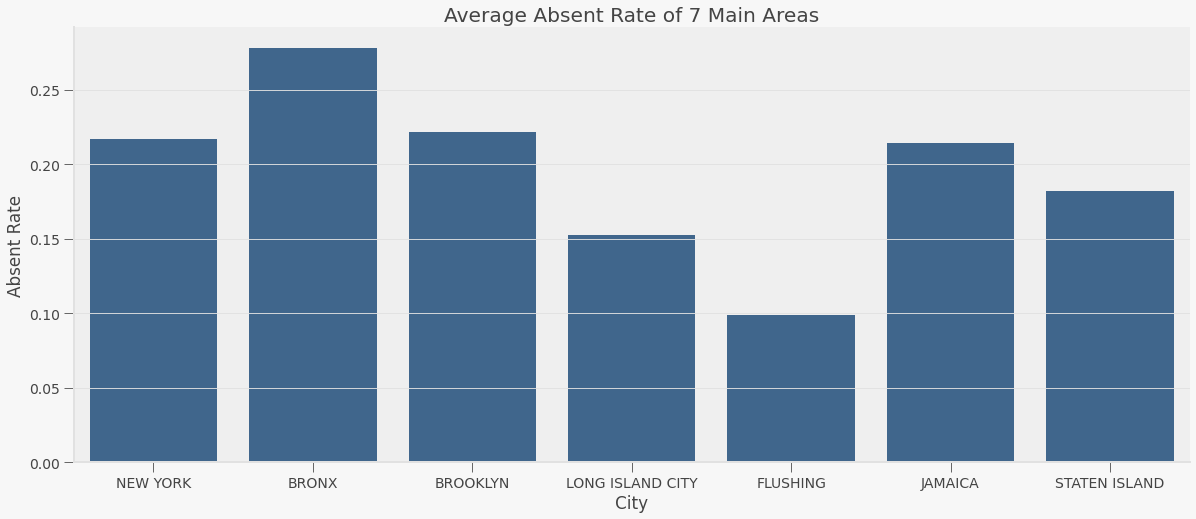

In [21]:
plt.figure(figsize=(20,8))
sns.barplot(x='City',y='Absent Rate',data=df2,ci=None,color=(0.2, 0.4, 0.6, 0.6))
plt.title('Average Absent Rate of 7 Main Areas')

*Figure 2-2: Bar graph - Average Absent Rate of 7 Main Areas*

In the map, the pink points reflect the absent rate of schools in NYC. The darker points appear, the greater the absent rate. I label the 7 main areas' location by blue points. As we discussed in the last part, `New York`.`Bronx` and `Brooklyn` have a serious problem with students' absent rates. Moreover, those 3 areas have the most significant number of schools. It matches our assumption that the area with more schools will have the larger absent rate.

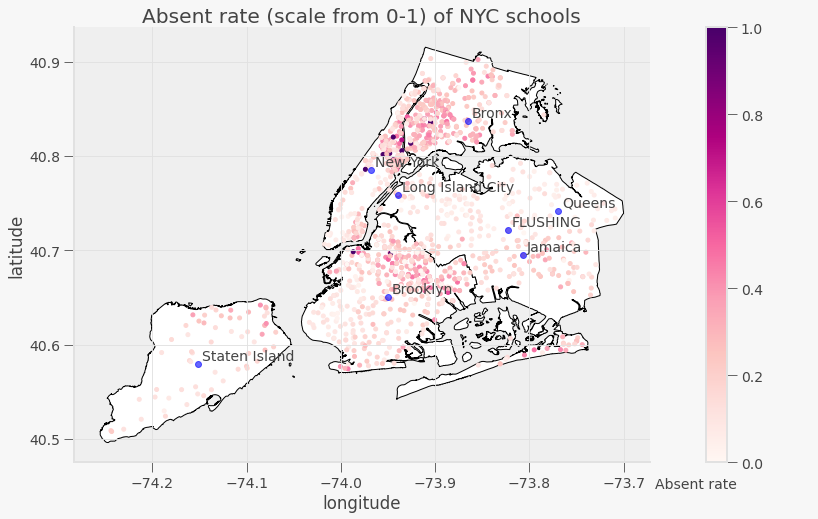

In [22]:
nyc_boros = gpd.read_file(gpd.datasets.get_path("nybb"))
#boro_locations = gpd.tools.geocode(boros.BoroName)

df["Coordinates"] = list(zip(df.Longitude, df.Latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
gdf_ca = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf_ca
fig, gax = plt.subplots(figsize=(20,8))
nyc_boros.to_crs("EPSG:4326").plot(ax=gax, color="white", edgecolor="k")
gdf_ca.plot(ax=gax,edgecolor="face",column='Absent Rate',legend=True,
            cmap="RdPu",s=16,vmin=0,vmax=1)
gax.annotate("Absent rate",xy=(0.8,0.06),xycoords='figure fraction')

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
plt.title("Absent rate (scale from 0-1) of NYC schools")


df_new = pd.DataFrame({
'Boroughs' : ['Bronx', 'Queens', 'New York' ,'Staten Island', 'Brooklyn',
              'Jamaica','Long Island City','FLUSHING' ],
'Latitude': [40.837048, 40.742054, 40.785091, 40.579021, 40.650002,
             40.694854,40.75855,40.721159],
'Longitude': [-73.865433, -73.769417, -73.968285, -74.151535,-73.949997,
              -73.806837,-73.939237,-73.823164] })

df_new["Coordinates"] = list(zip(df_new.Longitude, df_new.Latitude))
df_new["Coordinates"] = df_new["Coordinates"].apply(Point)
gdf = gpd.GeoDataFrame(df_new, geometry="Coordinates")

gdf.plot(ax=gax, color='blue', alpha = 0.6)

for x, y, label in zip(gdf['Coordinates'].x, gdf['Coordinates'].y, gdf['Boroughs']):
    gax.annotate(label, xy=(x,y), xytext=(4,4), textcoords='offset points')
    
plt.show()

*Figure 2-3: Map - Absent rate (scale from 0-1) of NYC schools*

Next, we focus on how races influence the absent race. We create a correlation matrix to find the correlation between variables. 
`Absent rate` is negatively correlated with `Percent Asian` and `Percent Asian`. However, `Absent rate` is positively correlated with `Percent Black` and `Percent Hispanic`. 
<br>
In other words, schools with large percent of Black and Hispanic have greater absent rates.

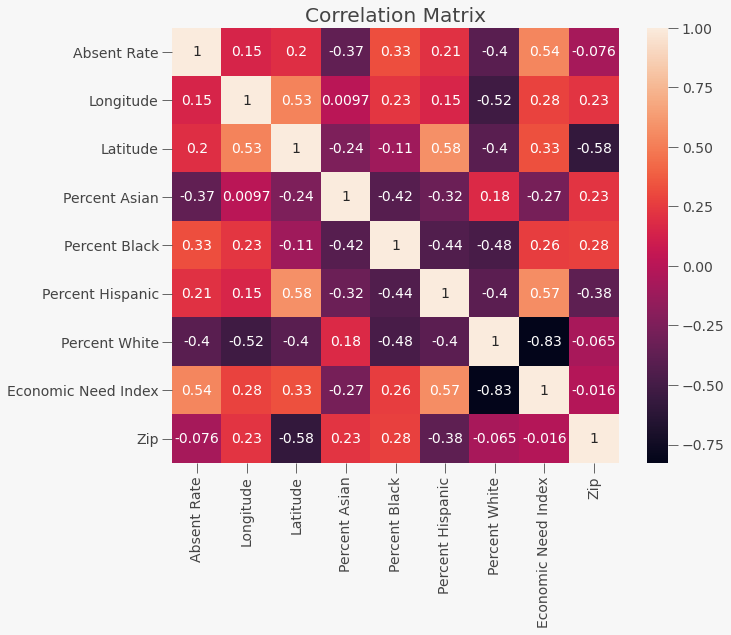

In [23]:
plt.figure(figsize=(10,8))
corrMatrix = df2.corr()
sns.heatmap(corrMatrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

*Figure 2-4: Heat map - Correlation Matrix*

For a more precise illustration, the following graph indicates each race performance on the absent rate.
<br>
Most of White and Asian Students in New York/Bronx/Brooklyn/Jamaica/Staten Island/Long Island City/FLUSHING schools have a absent rate around 20%. And Hispanics and Black Students occupy large percentage of all students who have more than 50% absent rate.

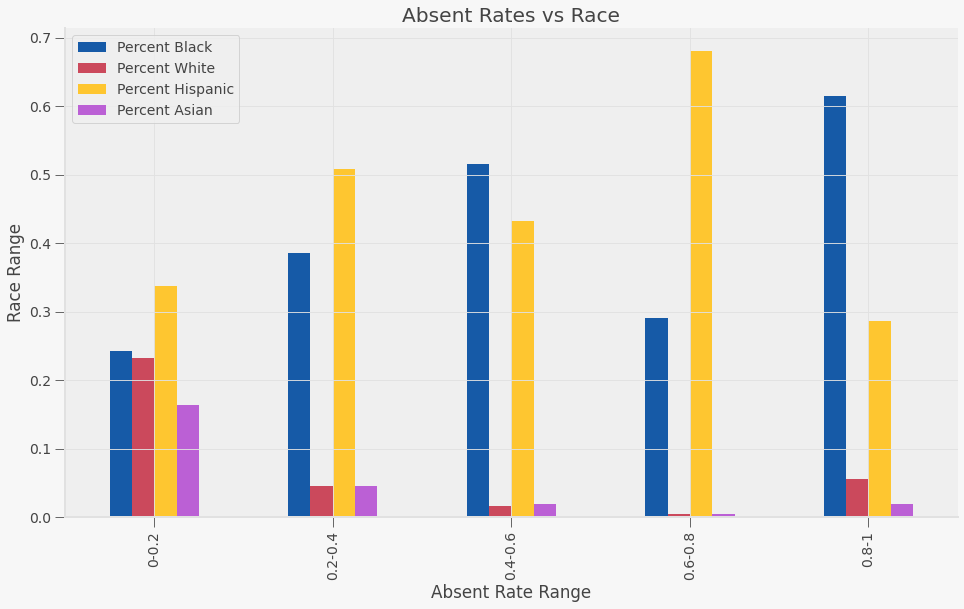

In [24]:
def xyz(feature1, feature2):
    a=df2[df2[feature1]<0.20][feature2].mean()
    b=df2[df2[feature1].between(0.20,0.40,inclusive=True)][feature2].mean()
    c=df2[df2[feature1].between(0.41,0.60,inclusive=True)][feature2].mean()
    d=df2[df2[feature1].between(0.61,0.80,inclusive=True)][feature2].mean()
    e=df2[df2[feature1]>0.80][feature2].mean()
    return [a,b,c,d,e]

z_black=xyz('Absent Rate', 'Percent Black')
z_asian=xyz('Absent Rate', 'Percent Asian')
z_white=xyz('Absent Rate', 'Percent White')
z_hispanic=xyz('Absent Rate', 'Percent Hispanic')

z2=['0-0.2','0.2-0.4','0.4-0.6','0.6-0.8','0.8-1']

df3=pd.DataFrame({'Percent Black':z_black,'Percent White':z_white,
                  'Percent Hispanic':z_hispanic, 'Percent Asian':z_asian},index=z2)

plt.rcParams["figure.figsize"] = [16,9]
df3.plot(kind='bar')
plt.xlabel('Absent Rate Range')
plt.ylabel('Race Range')
plt.title('Absent Rates vs Race')
plt.show()

*Figure 2-5: Bargraph - Absent Rates vs Race(in decimal)*

Next steps, I want to find the relationship between each school's `Economic Need Index` and `Absent rate`. Thus, I draw a regression plot; the positive slope indicates that the schools with high economic need index are likely to have large absent rate.

Text(0.5, 1.0, 'Economic Need Index vs Absent Rate')

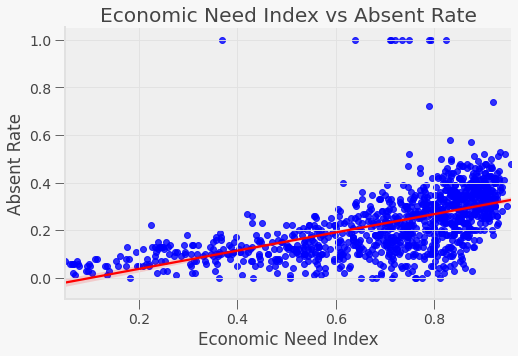

In [25]:
f, axes = plt.subplots(figsize=(8, 5))

f1=sns.regplot('Economic Need Index','Absent Rate',df2,
               scatter_kws={"color": "blue"}, line_kws={"color": "red"})
axes.set_title('Economic Need Index vs Absent Rate')

*Figure 2-6: Regression plot - Economic Need Index vs Absent Rate*

The following graph shows the Student Race vs Economic Need Index. Schools with large percent of White or Asian Students tend to have lower Economic Need Index. Oppositely, schools with higher percentage of Blacks or Hispanic Students tend to have higher Economic Need Index.

Text(0.5, 1.0, 'Economic Need Index and Percent Hispanic')

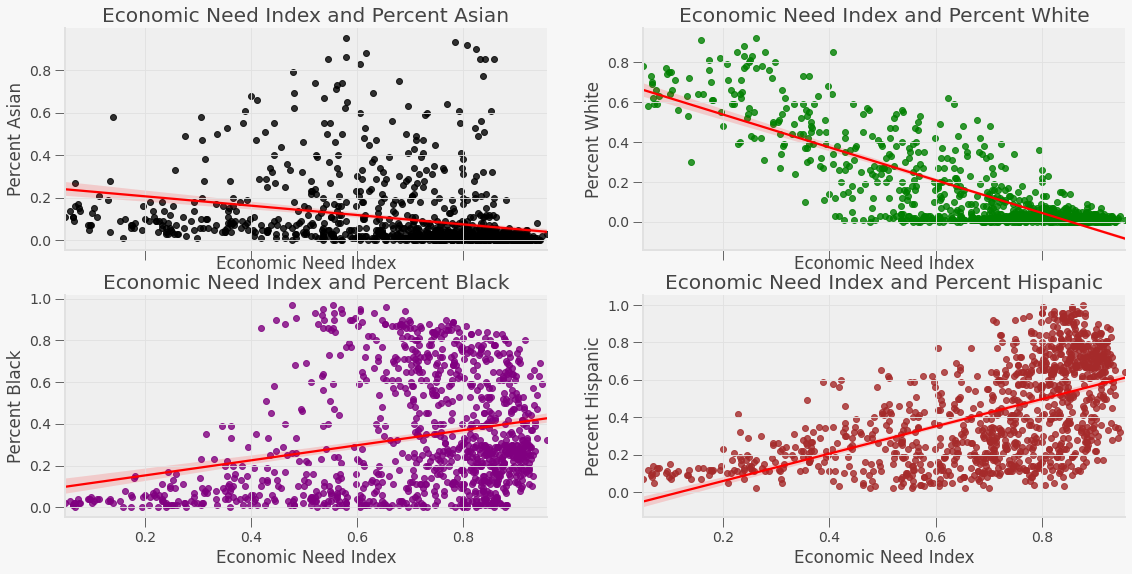

In [26]:
f, axes = plt.subplots(2, 2, figsize=(19, 9), sharex=True)

f1=sns.regplot('Economic Need Index','Percent Asian',df2,ax=axes[0,0],
               scatter_kws={"color": "black"}, line_kws={"color": "red"})
f2=sns.regplot('Economic Need Index','Percent White',df2,ax=axes[0,1],
               scatter_kws={"color": "green"}, line_kws={"color": "red"})
f2=sns.regplot('Economic Need Index','Percent Black',df2,ax=axes[1,0],
               scatter_kws={"color": "purple"}, line_kws={"color": "red"})
f2=sns.regplot('Economic Need Index','Percent Hispanic',df2,ax=axes[1,1],
               scatter_kws={"color": "brown"}, line_kws={"color": "red"})


axes[0,0].set_title('Economic Need Index and Percent Asian')
axes[0,1].set_title('Economic Need Index and Percent White')
axes[1,0].set_title('Economic Need Index and Percent Black')
axes[1,1].set_title('Economic Need Index and Percent Hispanic')

*Figure 2-7: Regression plot - Economic Need Index vs Race*

## Conclusion

In project 2 analysis, we can conclude that the areas with a large number of schools have a greater absent rate. Moreover, the race White and Asian are negatively correlated with absent rate, which is good. However, the race Black and Hispanic are positively correlated with absent rate, which brings up a concern. Both results match our intuition about the possible answer to our question.
<br>

And we also do some in-depth research about how economic need index related to absent rate/different race. Based on the result I listed in the analysis part, in order to decrease the absent rate, the bureau of education should provide more economic support for those schools with high economic need index, especially for those schools with large percent of race Black and Hispanic students.

# Project 3

## Introduction

Our paper's main question is to analyze how the school demographic influences the students chronically absent rate. From project one and project two, we use `2016 School Explorer` to see how the school's location, student race and economic need index affect the absent rate  based on the summary statistics, visualized graphs and map. In project 3, I will add more information to the dataset using web scraping. After merging these two datasets, we will build a new relationship between population and absent rate. The hypothesis is that if an area with a large population, that area's absence rate will be much greater.

## Web Scarping

1）The data `New York Zip Codes by Population` is from the US Census. It included 1753 New York zip codes and collected accurate population information based on the zip code in New York City. Based on this data, I can research how population influences the absence rate in New York City. Furthermore, we may use it to investigate the potential correlation between the economic need index and population.
<br>
2）We can scrape the data from https://www.newyork-demographics.com/zip_codes_by_population. 
<br>
3）Since my original data and the new data contain columns with zip code information, I will merge two datasets by `zip` and add the population information into the original data. In the analysis part, I will build a histogram and regression graph to find the relationship between population and absent rate.

In this case, we don't need to run our program over time to generate data. Scape the data from the website is not a complicated coding. We need to be careful about selecting the tables' rows and strip the unnecessary blank space and comments. 
<br>
However, the scraped table is not prepared for merging. Cleansing the dataframe is the most challenge part. For example, there have more than 2 zip codes connected by `and` in one row; then, we need to separate them, rematch the population data and then create a new data frame to store the information. It better for us learn more about how to efficiently use the python code techniques to achieve the result we want. 

### Scrape data

First, we import the packages that we need to use for web scarping.

In [27]:
import re
import requests
import pandas as pd
from bs4 import BeautifulSoup

The second step is parsing HTML and accessing different elements. The response content can be passed to a `BeautifulSoup()` method to obtain a soup object which is structured. We can also uncomment the soup_object to explore the schema and understand the structure of the web page, which helps us extract relevant data from the web page.
<br>
In our case, the data is enclosed in the `<table>` HTML tag with the class name `ranklist`.
<br>
Meanwhile,  every row of data is enclosed under a `<tr>` HTML tag. All these row values can be extracted into a list of values by finding the `<tr>` values from our newly created soup object `data_table`.
<br>
In this case, the last row of the table records the reference info, which will not be used in the merging process, so we will not scrape it.

In [28]:
web_url = 'https://www.newyork-demographics.com/zip_codes_by_population'
response = requests.get(web_url)

soup_object = BeautifulSoup(response.content)
# Uncomment the below line and look into the contents of soup_object
# soup_object
data_table = soup_object.find_all('table', 'ranklist')[0]
# Uncomment the below line and look into the contents of data_table
#data_table

all_values = data_table.find_all('tr')
#We don't need the last row for the website table
all_values=all_values[:-1] 

The first element of the list contains the column names 'Rank, Zip Code and Population'. The following elements of the list have soup objects which contain the population data. This data can be extracted in a loop since all the list elements' structure is the same. When we are using the `for loop`, We need to use `strip()` to delete the empty space in front of/behind the value and the unnecessary info at the same time.

In [29]:
# Create an empty dataframe
Zip_Codes_by_Population = pd.DataFrame(columns = ['Rank', 'Zip Code', 'Population']) 
ix = 0 # Initialise index to zero

for row in all_values[1:]:
    values = row.find_all('td') # Extract all elements with tag <td>
    # Pick only the text part from the <td> tag
    # we use text.strip() to delete the empty space in front of/behind the value
    # we use rstrip('\n          \n            TIE') to delete 
    # the unnecessary info in Rank
    Rank = values[0].text.strip().rstrip('\n          \n            TIE')
    Zip_Code = values[1].text.strip()
    Population = values[2].text.strip()
    Zip_Codes_by_Population.loc[ix] = [Rank, Zip_Code, Population] 
    # Store it in the dataframe as a row
    ix += 1
    
# Print the first 10 rows of the dataframe
Zip_Codes_by_Population

Rank         Zip Code Population
0         1            11368    112,425
1         2            11385    106,717
2         3            10467    103,732
3         4            11211    102,624
4         5            11236    100,331
...     ...              ...        ...
1600  1,601            13475         16
1601  1,602            13826         15
1602  1,603  14854 and 13623         13
1603  1,604            13353         10
1604  1,605            12862          5

[1605 rows x 3 columns]

### Recoding process

The scraped data is not perfect. We noticed that there have more than two zip codes in one row. Our next step is to build a new data frame that each zip code matches one population number based on the scraping table.

In [30]:
# Select the rows which zipcode contains 'and'
df_has_and = Zip_Codes_by_Population[Zip_Codes_by_Population['Zip Code'].str.contains('and')]
# Select the rows which zipcode do not contain 'and'
df_no_and = Zip_Codes_by_Population[~Zip_Codes_by_Population['Zip Code'].str.contains('and')]

# create a new df that has single zipcode in one row (change from the rows with 'and')
idx = 0
new_df = pd.DataFrame(columns=Zip_Codes_by_Population.columns)
for index, row in df_has_and.iterrows():
    split_zip_codes = filter(lambda code: code!= '',
                             [code.strip() for code in
                              re.split(r',|and',row['Zip Code'])])
    for code in split_zip_codes:
        new_df.loc[idx]=[row['Rank'],code,row['Population']]
        idx+=1
new_df

# recombine the the 2 dataframes
zipdata=df_no_and.append(new_df)

Moreover, we need to  check the type of data points and transfer them into numeric.

In [31]:
#rename the column
zipdata.rename(columns={'Zip Code': 'Zip'}, inplace=True)
#change the type of values in each columns
zipdata['Rank'] = zipdata['Rank'].apply(lambda x: x.replace(',',''))
zipdata['Rank']=zipdata['Rank'].astype(int)
zipdata['Zip']=zipdata['Zip'].astype(int)
zipdata['Population'] = zipdata['Population'].apply(lambda x: x.replace(',',''))
zipdata['Population']=zipdata['Population'].astype(int)

zipdata.sort_values(by='Rank', ascending=True)
zipdata

Rank    Zip  Population
0       1  11368      112425
1       2  11385      106717
2       3  10467      103732
3       4  11211      102624
4       5  11236      100331
..    ...    ...         ...
276  1595  12438          32
277  1596  12811          28
278  1596  12490          28
279  1603  14854          13
280  1603  13623          13

[1753 rows x 3 columns]

The last step is to store the data frame as a csv file. Pandas has a `to_csv` method which can be used to save the data into the file.

In [32]:
zipdata.to_csv('zipdata.csv', index=False) # convert dataframe into csv file

## Merge Data

Since both data has `Zip` column, we can easily merge the new scraped data with our original data by using function `merge()`. 

In [33]:
df_combine=pd.merge(df2, zipdata, on="Zip",how="left")
df_combine.head()

School Name  Absent Rate      City  Longitude  \
0       P.S. 015 ROBERTO CLEMENTE         0.18  NEW YORK -73.978766   
1             P.S. 019 ASHER LEVY         0.30  NEW YORK -73.984231   
2            P.S. 020 ANNA SILVER         0.20  NEW YORK -73.986315   
3  P.S. 034 FRANKLIN D. ROOSEVELT         0.28  NEW YORK -73.975043   
4       THE STAR ACADEMY - P.S.63         0.23  NEW YORK -73.986360   

    Latitude  Percent Asian  Percent Black  Percent Hispanic  Percent White  \
0  40.721834           0.05           0.32              0.60           0.01   
1  40.729892           0.10           0.20              0.63           0.06   
2  40.721274           0.35           0.08              0.49           0.04   
3  40.726147           0.05           0.29              0.63           0.04   
4  40.724404           0.04           0.20              0.65           0.10   

   Economic Need Index    Zip  Rank  Population  
0                0.919  10009  70.0     57925.0  
1                0.641  10003  75.0     54682.0  
2                0.744  10002  35.0     74993.0  
3                0.860  10009  70.0     57925.0  
4                0.730  10009  70.0     57925.0

## Analysis

In project 2, we noticed that the mean of absent student rate is highest in the Bronx, followed by Brooklyn, New York, Jamaica and Staten Island. And the absence rate is the smallest in Flushing and Long Island City.
<br>
When we look that the mean of the population in each city, we found that Brooklyn, Bronx, New York and Jamaica are still in the lead place. LongIsland City has the smallest value. Thus, there may have some potential connections between absent rate and population.

Text(0.5, 1.0, 'Average Population of 7 Main Areas')

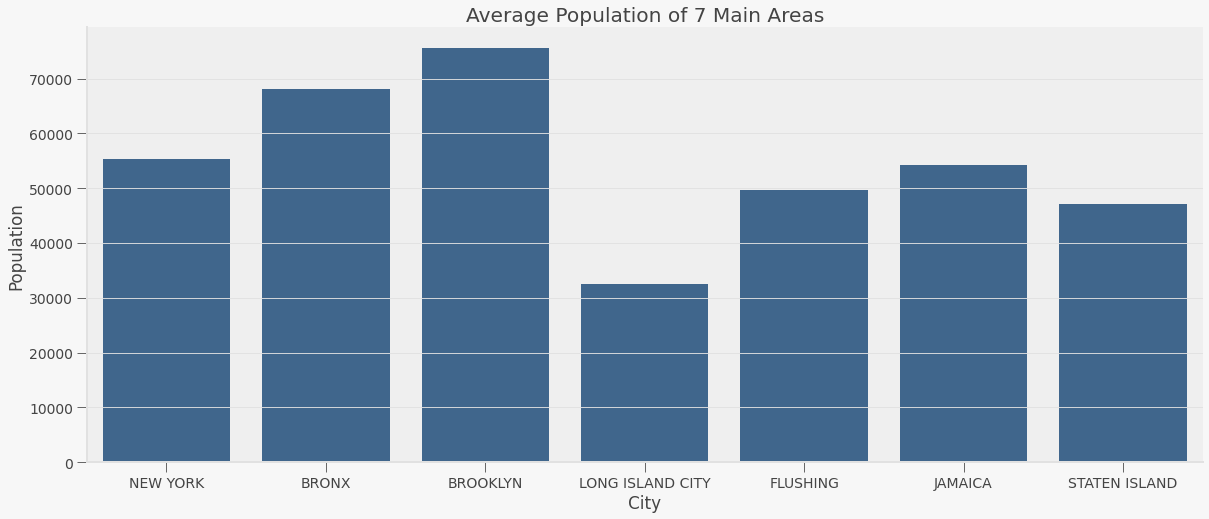

In [34]:
plt.figure(figsize=(20,8))
sns.barplot(x='City',y='Population',data=df_combine,ci=None,color=(0.2, 0.4, 0.6, 0.6))
plt.title('Average Population of 7 Main Areas')

*Figure 3-1: Bargraph - Average Population of 7 Main Areas*

Then we run a correlation table to find the relevance between absent rate, population and economic need index. It is clear to see that there exists a positive correlation between absence rate and population. However, this relationship is relatively weak since the value(0.071402) is less than 0.1.
<br>
The correaltion between Population and Economic Index Rate is also positive with value of 0.226890.The population has stronger impact on Economic Need Index.

In [35]:
df_test = pd.DataFrame(df_combine,columns=['Absent Rate','Population','Economic Need Index'])
corrMatrix = df_test.corr()
print (corrMatrix)

                     Absent Rate  Population  Economic Need Index
Absent Rate             1.000000    0.071402              0.54112
Population              0.071402    1.000000              0.22689
Economic Need Index     0.541120    0.226890              1.00000


The following graph shows the Population vs Absent Rate. We have a gradual slope, which proves that the population's influence on the absent rate is week. Thus, our hypothesis is not exactly right.

Text(0.5, 1.0, 'Population vs Absent Rate')

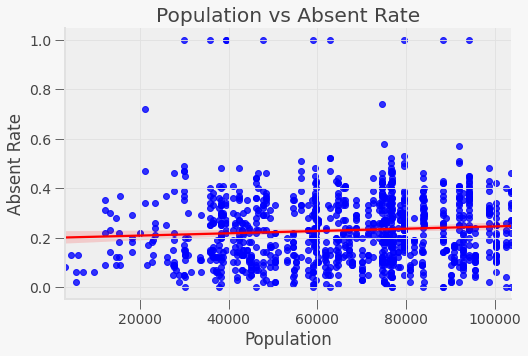

In [36]:
f, axes = plt.subplots(figsize=(8, 5))

f1=sns.regplot('Population','Absent Rate',df_combine,
               scatter_kws={"color": "blue"}, line_kws={"color": "red"})
axes.set_title('Population vs Absent Rate')

*Figure 3-2: Regression plot-Population vs Absent Rate*

The following graph shows the Population vs Economic Need Index. We have a much steeper slope, which proves that the population's influence on the Economic Need Index is apparent. Since from Project 2, we know that the Economic Need Index and Absent Rate are highly positively related. Thus, I conclude that the population's direct influence on the absent rate is insignificant. However, its may exists some potential indirect effects (through impact the Economic Need Index first, then influence Absent Rate).

Text(0.5, 1.0, 'Economic Need Index vs Population')

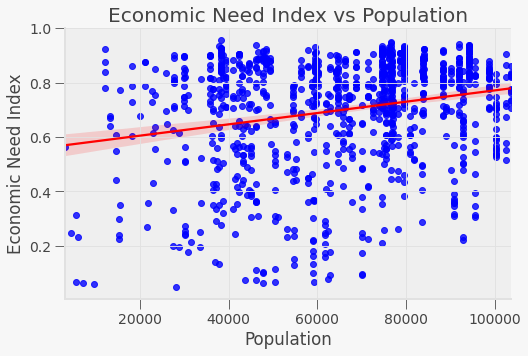

In [37]:
f, axes = plt.subplots(figsize=(8, 5))

f2=sns.regplot('Population','Economic Need Index',df_combine,
               scatter_kws={"color": "blue"}, line_kws={"color": "red"})
axes.set_title('Economic Need Index vs Population')

*Figure 3-3: Regression plot-Economic Need Index vs Population*

## Conclusion and Summary

For our findings so far, in project one and project two, we noticed that the areas with a large number of schools have a greater absence rate. And the absent rate is positively correlated with race Black and Hispanic and negatively correlated with race White and Asian.

In project 3, we use web scraping to get more useful information (i.e. population) to our dataset. From the above analysis, We find that the direct effects of population on absence rate are inapparent. Thus, I do not support the hypothesis that if an area with a large population, that area's absence rate will be much greater. Nevertheless, the population may indirectly affect the absent rate, which acts based on the population's effects on the Economic Need Index. In other words, the increase in population leads to the rise in Economic Need Index, and then the increase in Economic Need Index causes an increase in the absent rate. 

# Resources:
1.https://www.kaggle.com/randylaosat/simple-exploratory-data-analysis-passnyc
<br>
2.https://www.kaggle.com/passnyc/data-science-for-good
<br>
3.https://github.com/meghanarai96/PassNYC-Data-Science-for-Good-Kaggle/blob/master/PASSNYC.ipynb
<br>
4.https://www.newyork-demographics.com/zip_codes_by_population